In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [5]:
df.shape

(10000, 6)

In [6]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## EDA

In [7]:
cat_cols = []
num_cols = []

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [9]:
cat_cols

['Extracurricular Activities']

In [10]:
num_cols

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

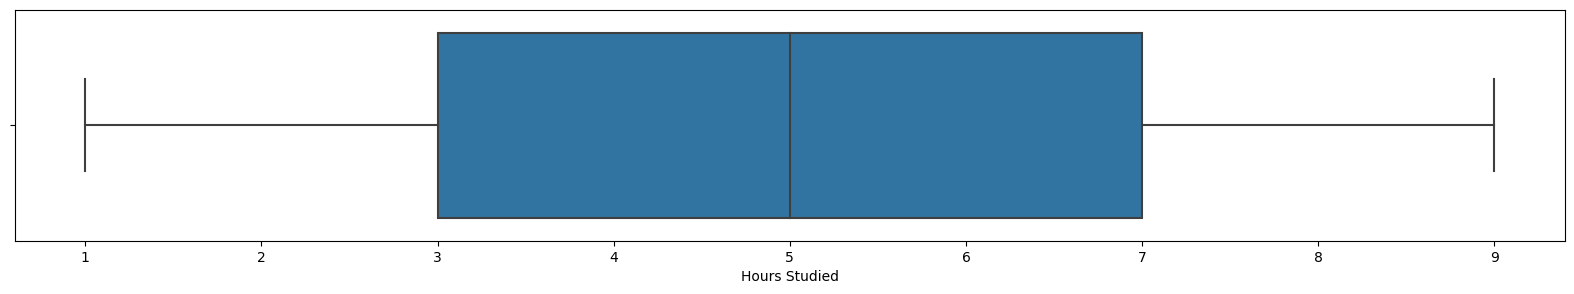

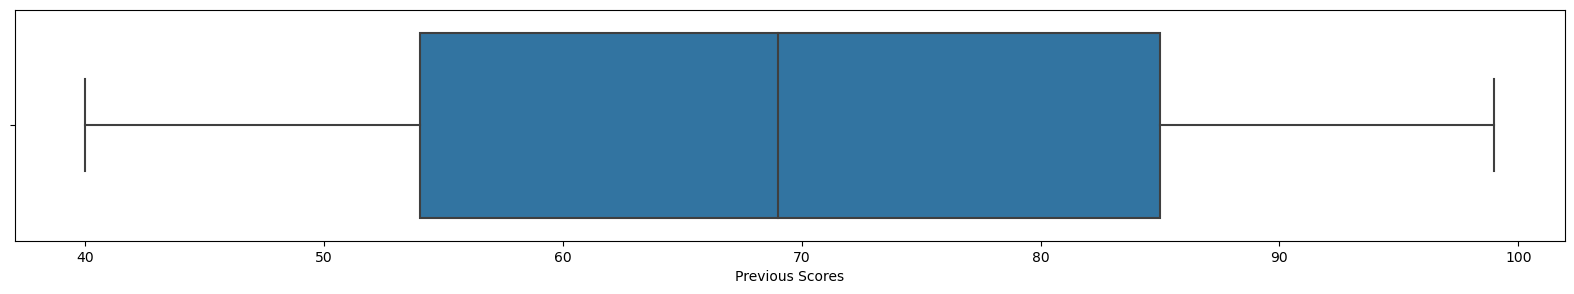

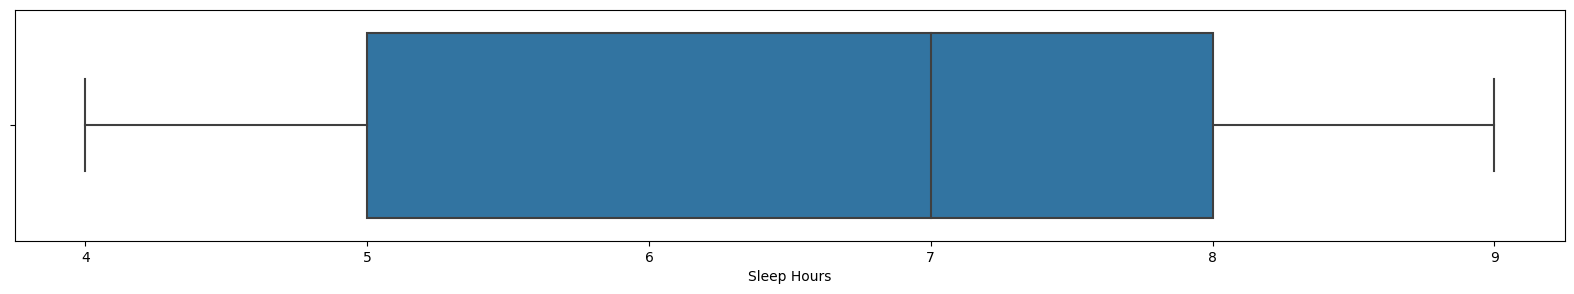

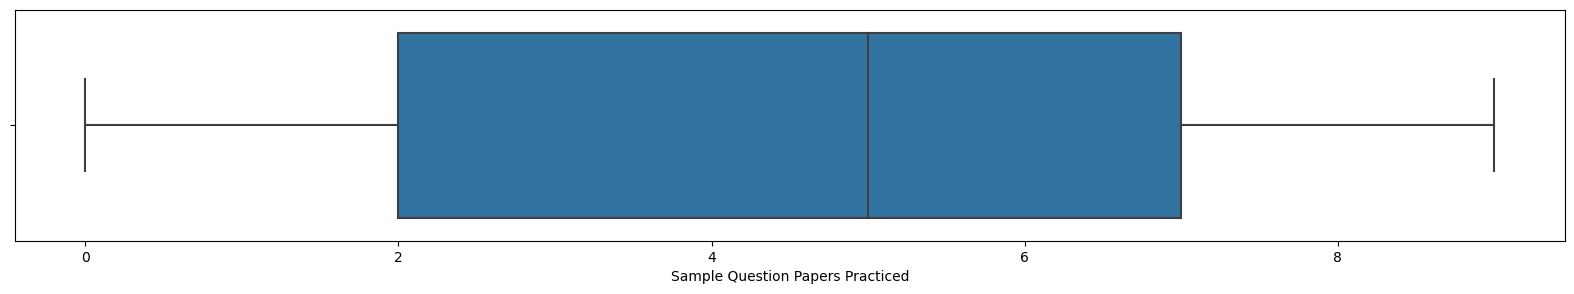

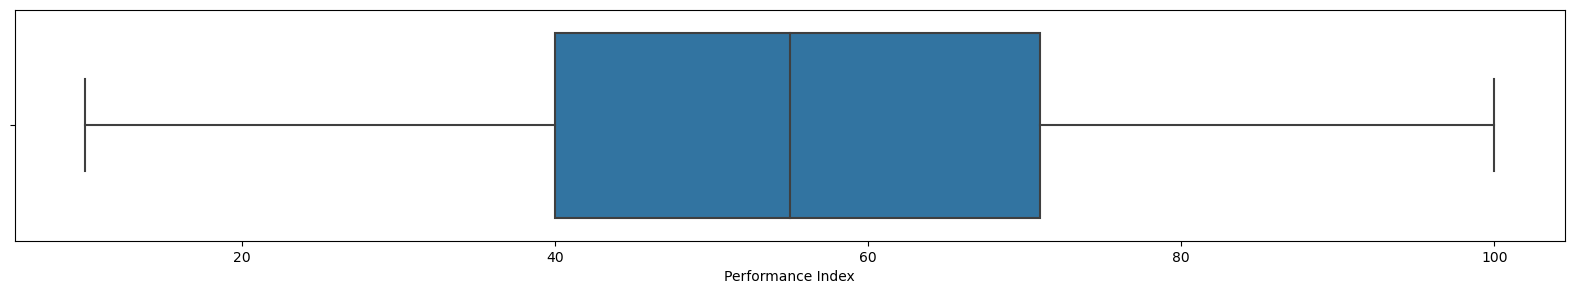

In [11]:
for col in num_cols:
    plt.figure(figsize=(20,3))
    sns.boxplot(x=df[col])

<Figure size 2000x1000 with 0 Axes>

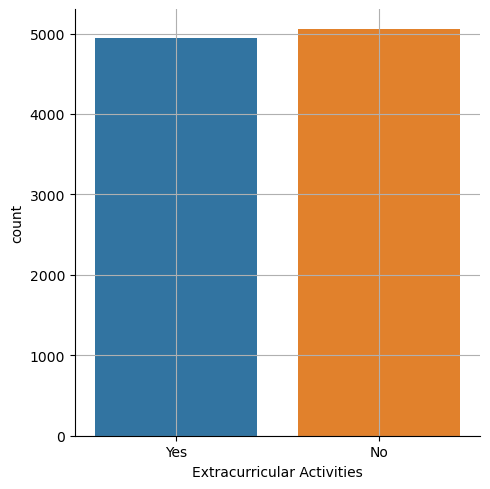

In [13]:
plt.figure(figsize=(20,10))
sns.catplot(data=df,x='Extracurricular Activities',kind='count')
plt.grid()

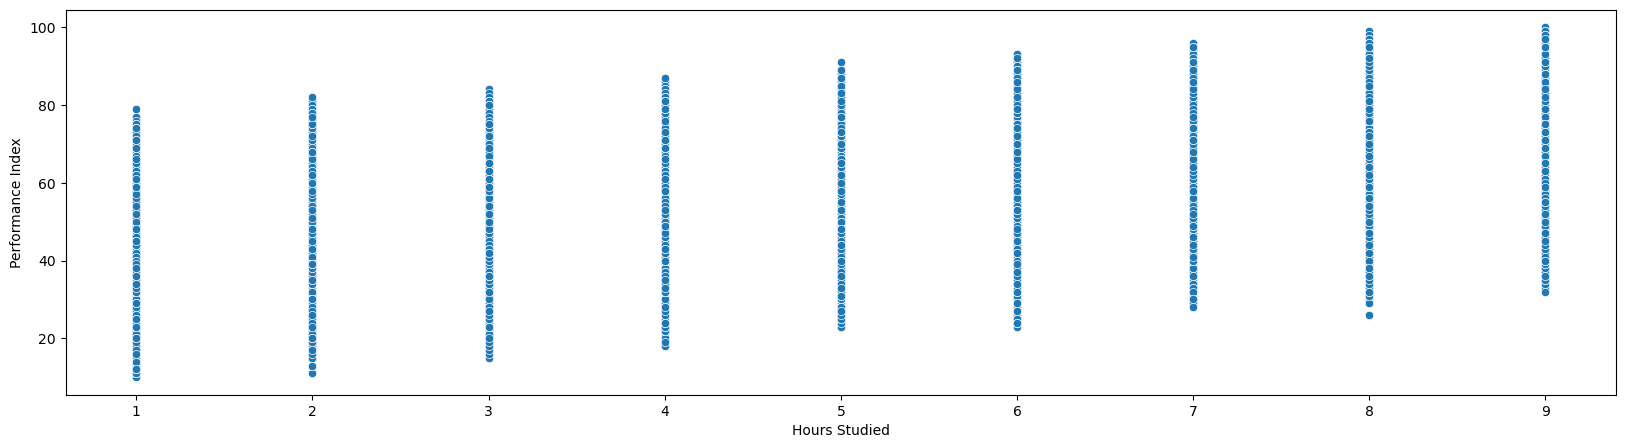

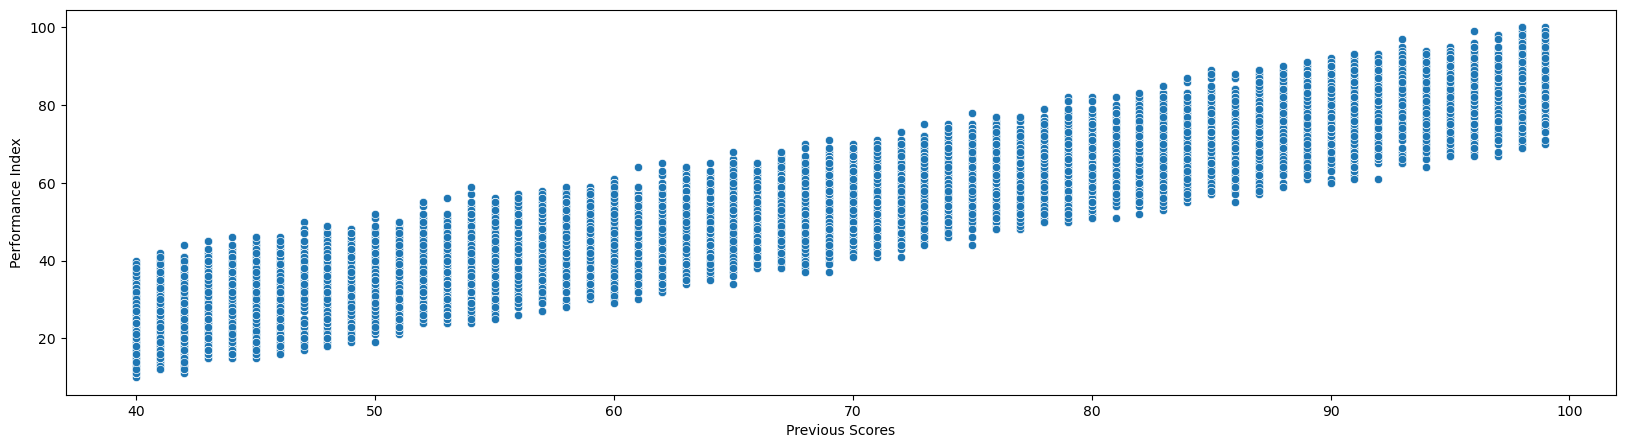

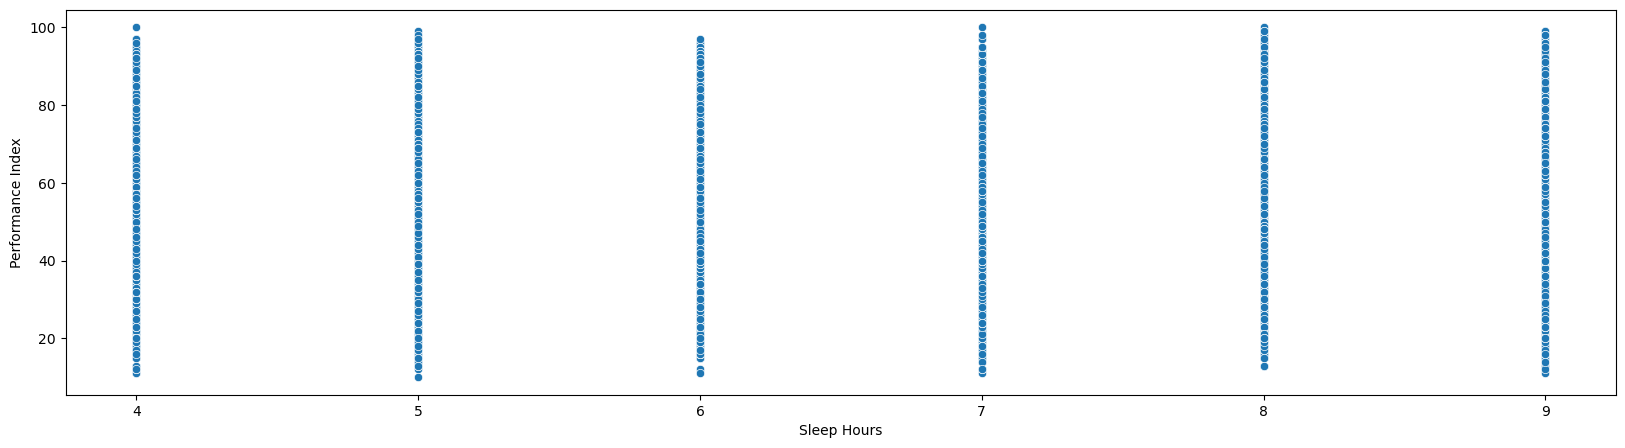

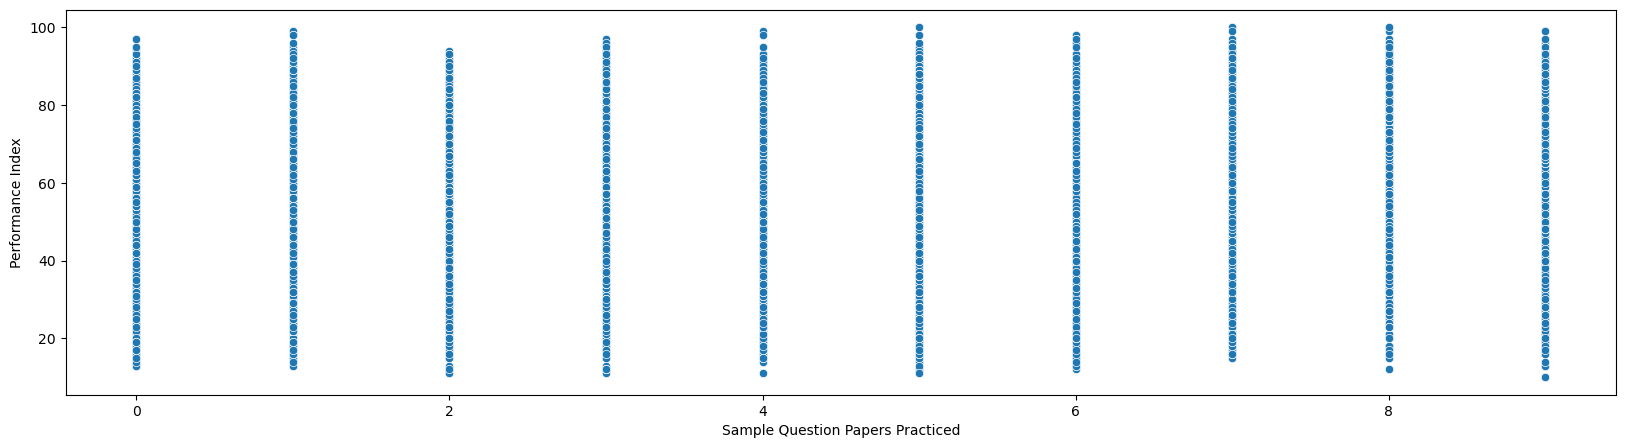

In [22]:
for col in num_cols[0:-1]:
    plt.figure(figsize=(20,5))
    sns.scatterplot(data=df,x=col,y='Performance Index')

/var/folders/nl/59fv6s9j1pz23rr6zp7_z8bm0000gn/T/ipykernel_10052/3648873261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

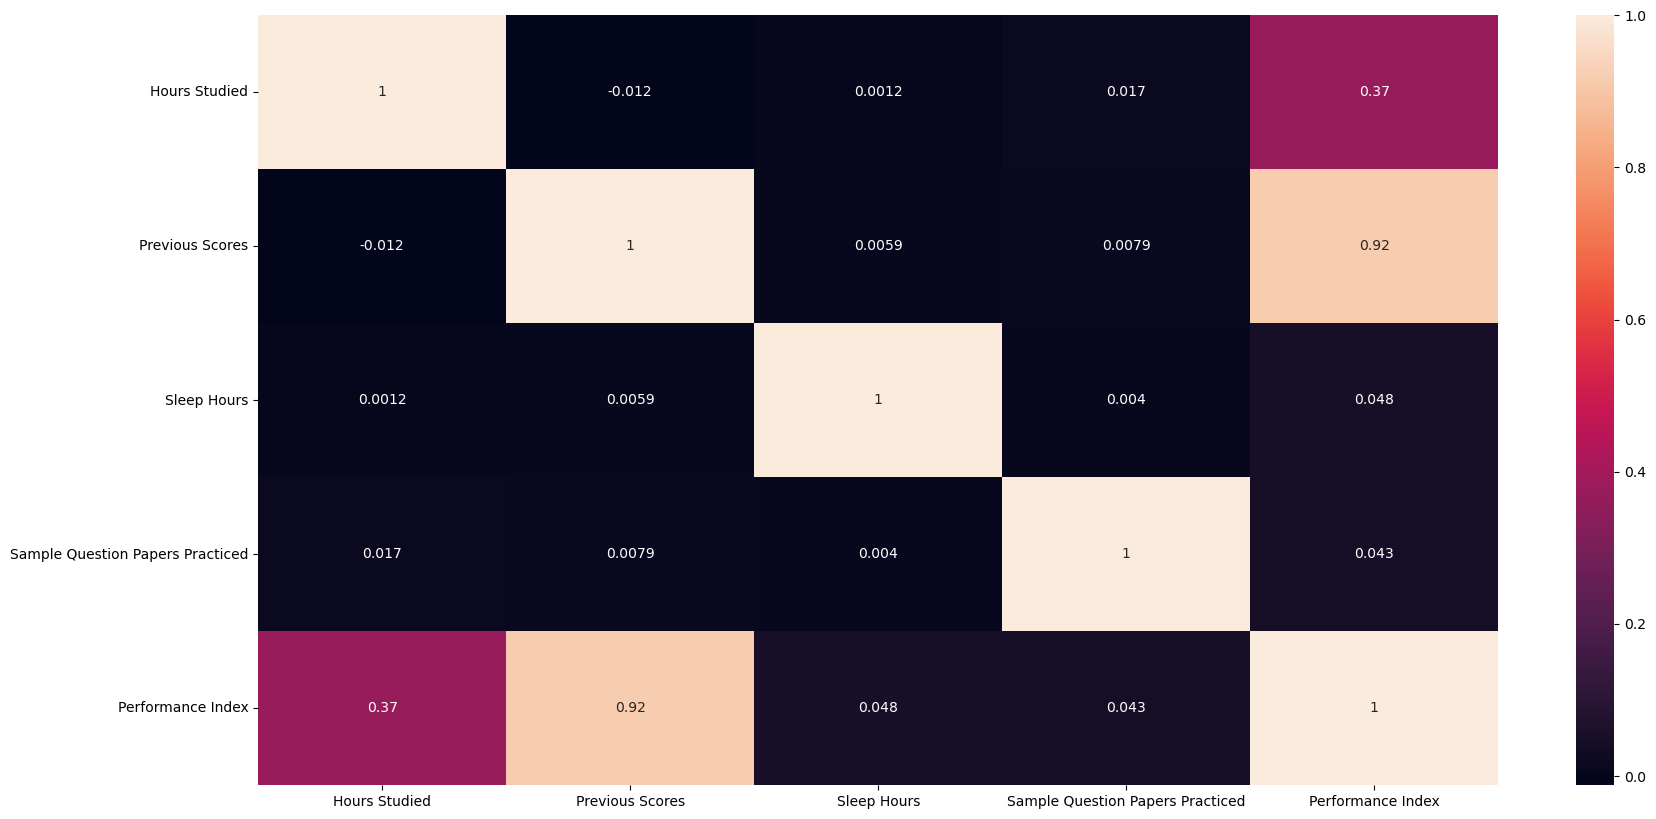

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
temp = pd.get_dummies(df['Extracurricular Activities'])
temp

,No,Yes
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,0,1


In [26]:
df.drop('Extracurricular Activities',axis=1,inplace=True)

In [27]:
df = pd.concat([df,temp],axis=1)
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,No,Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0,1
9996,7,64,8,5,58.0,0,1
9997,6,83,8,5,74.0,0,1
9998,9,97,7,0,95.0,0,1


In [28]:
X = df.drop('Performance Index',axis=1)
y = df['Performance Index']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
lin_rg = LinearRegression()
las_rg = Lasso()
rid_rg = Ridge()
dt_rg = DecisionTreeRegressor()
rf_rg = RandomForestRegressor()
knn_rg = KNeighborsRegressor(n_neighbors=10)

In [31]:
regressors = [lin_rg,las_rg,rid_rg,dt_rg,rf_rg,knn_rg]

In [34]:
for reg in regressors:
    reg.fit(x_train,y_train)
    pred_train = reg.predict(x_train)
    pred_test = reg.predict(x_test)
    print("The r2 score for the train model for",reg,"is",r2_score(y_train,pred_train))
    print("The mean squared error for the train model for",reg,"is",mean_squared_error(y_train,pred_train,squared=True))
    print("The r2 score for the test model for",reg,"is",r2_score(y_test,pred_test))
    print("The mean squared error for the test model for",reg,"is",mean_squared_error(y_test,pred_test,squared=True))

The r2 score for the train model for LinearRegression() is 0.9889033042773491
The mean squared error for the train model for LinearRegression() is 4.164148459949529
The r2 score for the test model for LinearRegression() is 0.9880686410711422
The mean squared error for the test model for LinearRegression() is 4.105609215835817
The r2 score for the train model for Lasso() is 0.9869735314606335
The mean squared error for the train model for Lasso() is 4.888315428534197
The r2 score for the test model for Lasso() is 0.9859139624668802
The mean squared error for the test model for Lasso() is 4.847039289943023
The r2 score for the train model for Ridge() is 0.9889033042052521
The mean squared error for the train model for Ridge() is 4.164148487004657
The r2 score for the test model for Ridge() is 0.9880686830569686
The mean squared error for the test model for Ridge() is 4.105594768412313
The r2 score for the train model for DecisionTreeRegressor() is 0.9993514500389515
The mean squared erro